### Classification
- [Binary Classifier](#SGDClassifier) (*Incomplete/Error*)
- [SVC](#svc)
- SKlearn [Confusion Matrix](#confusion_matrix)
- Classification [Evaluation Metrics](#eval_metrics)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

`Regression`: predicting values <br>
`Classification`: predicting classes

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

print(f"Shape of DF: {X.shape}")
print(f"Number of Images: {X.shape[0]}")
print(f"Features in each image: {X.shape[1]}")
print(f"Which means image's resolution: {int(np.sqrt(X.shape[1]))} X {int(np.sqrt(X.shape[1]))} pixels")

Shape of DF: (70000, 784)
Number of Images: 70000
Features in each image: 784
Which means image's resolution: 28 X 28 pixels


### Another way of importing MNIST data
```python
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
```

<a id="SGDClassifier"></a>
## Training a binary classifier
<font color="teal"><b>Stochastic Gradient Classifier</b></font>
```python
from sklearn.linear_model import SGDClassifier
```

In [4]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8) # As the numeral representation in target is in string format

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5.value_counts()

False    54579
True      5421
Name: class, dtype: int64

In [6]:
print(X_train.shape)
print(y_train_5.shape)

(60000, 784)
(60000,)


In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

```python
sgd_clf.predict([X_train[0]])
```

### Another way of importing MNIST data
```python
from sklearn import datasets
# load dataset
digits = datasets.load_digits()

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)
```

In [9]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

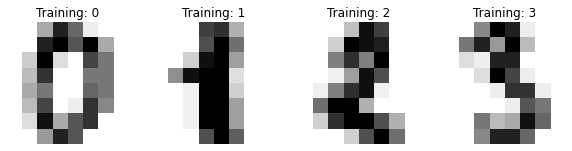

In [10]:
# Plotting some digits on screen

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training: {label}')
    
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

<a id="svc"></a>
## Support Vector Classifier

<font color="teal"><b>Support Vector Classifier</b></font>
```python
from sklearn import svm
```

In [11]:
# Create a classifier: a Support Vector Classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

y_train_5 = (y_train==5); y_test_5 = (y_test==5)

print(y_train.shape); print(y_train_5.shape)

(1437,)
(1437,)


In [12]:
# Learn the digits on the train subset
clf.fit(X_train, y_train_5)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

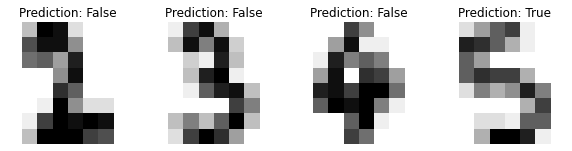

In [14]:
# Plotting predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) builds a text report showing the main classification metrics

In [15]:
print(f"Classification report for classifier: {clf}:\n\n"
      f"{metrics.classification_report(y_test_5, predicted)}\n")

Classification report for classifier: SVC(gamma=0.001):

              precision    recall  f1-score   support

       False       1.00      0.99      1.00       323
        True       0.95      1.00      0.97        37

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.99       360
weighted avg       0.99      0.99      0.99       360




<a id="confusion_matrix"></a>
### Sklearn Confusion Matrix

[[321   2]
 [  0  37]]


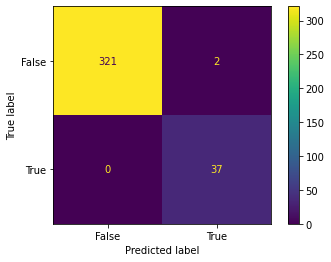

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test_5, predicted))

plot_confusion_matrix(clf, X_test, y_test_5)  
plt.show()

<a id="eval_metrics"></a>
# Classification Evaluation Metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_5, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_5, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_5, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_5, predicted)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_5, predicted)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_5, predicted)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_5, predicted)
print(matrix)

Accuracy: 0.994444
Precision: 0.948718
Recall: 1.000000
F1 score: 0.973684
Cohens kappa: 0.970581
ROC AUC: 0.996904
[[321   2]
 [  0  37]]
